In [1]:
import python.inscy as INSCY
import time
import matplotlib.pyplot as plt
import numpy as np

Compiling our c++/cuda code, this usually takes 1-2 min. 
Finished compilation, took: 69.4469s


In [11]:
params={"n":300, 
        "neighborhood_size":0.15,
        "F": 10.,
        "num_obj" : 2,
        "subspace_size_min" : 2,
        "subspace_size_max" : 10}

print("Loading Glove...")
t0 = time.time()
X = INSCY.normalize(INSCY.load_glove(params["n"], params["subspace_size_max"]))
print("Finished loading Glove, took: %.4fs" % (time.time() - t0))

print("Running INSCY on the CPU. ")
print()
subspace_sizes = list(range(params["subspace_size_min"], params["subspace_size_max"]+1))
times = []
for subspace_size in subspace_sizes:
    t0 = time.time()
    subspaces, clusterings = INSCY.run_cpu(X[:, :subspace_size], params["neighborhood_size"], params["F"], params["num_obj"])
    times.append(time.time() - t0)
    print("Finished INSCY, took: %.4fs" % (time.time() - t0))
    print()

np.savez('plot_data/inc_d_const_n=300_cpu.npz', subspace_sizes=subspace_sizes, times=times, params=params)

Loading Glove...
Finished loading Glove, took: 0.0111s
Running INSCY on the CPU. 

Finished INSCY, took: 0.5752s

Finished INSCY, took: 1.0156s

Finished INSCY, took: 1.3547s

Finished INSCY, took: 1.9567s

Finished INSCY, took: 3.0867s

Finished INSCY, took: 4.5791s

Finished INSCY, took: 7.0601s

Finished INSCY, took: 9.6342s

Finished INSCY, took: 17.1294s



In [ ]:
params={"n":300, 
        "neighborhood_size":0.15,
        "F": 10.,
        "num_obj" : 2,
        "subspace_size_min" : 2,
        "subspace_size_max" : 15}

print("Loading Glove...")
t0 = time.time()
X = INSCY.normalize(INSCY.load_glove(params["n"], params["subspace_size_max"]))
print("Finished loading Glove, took: %.4fs" % (time.time() - t0))

print("Running INSCY on the CPU. ")
print()
subspace_sizes = list(range(params["subspace_size_min"], params["subspace_size_max"]+1))
times = []
for subspace_size in subspace_sizes:
    t0 = time.time()
    subspaces, clusterings = INSCY.run_cpu_gpu_mix(X[:, :subspace_size], params["neighborhood_size"], params["F"], params["num_obj"])
    times.append(time.time() - t0)
    print("Finished INSCY, took: %.4fs" % (time.time() - t0))
    print()

np.savez('plot_data/inc_d_const_n=300_mix.npz', subspace_sizes=subspace_sizes, times=times, params=params)

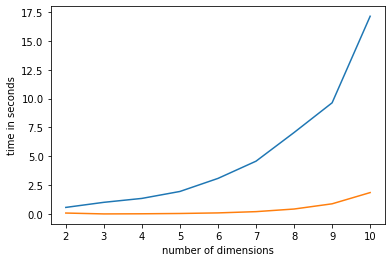

In [3]:
data = np.load('plot_data/inc_d_const_n=300_cpu.npz', allow_pickle=True)
subspace_sizes = data["subspace_sizes"]
times = data["times"]
plt.plot(subspace_sizes, times)

data = np.load('plot_data/inc_d_const_n=300_mix.npz', allow_pickle=True)
subspace_sizes = data["subspace_sizes"]
times = data["times"]
plt.plot(subspace_sizes, times)

plt.ylabel('time in seconds')
plt.xlabel('number of dimensions')
plt.show()